In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# charger le fichier csv dans un dataframe
df = pd.read_csv('archive/StudentPerformanceFactors.csv')

In [3]:
# afficher un résumé statistique des colonnes numériques
print(df.describe())
# afficher un résumé concis des colonnes
print(df.info())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [4]:
# afficher les colonnes qui ont des valeurs manquantes + somme des valeurs manquantes
print(df.isnull().sum())
# supprimer les lignes avec des valeurs manquantes
df.dropna(axis=0, inplace=True)
# vérifier que les lignes avec des valeurs manquantes ont été supprimées
print(df.isnull().sum())

# supprimer les lignes avec une note obtenue à l'examen supérieur à 100
df.drop(df[df['Exam_Score'] > 100].index, inplace=True)
# vérifier qu'il n'y a plus de lignes avec un score à l'examen supérieur à 100
print(df['Exam_Score'].max())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_

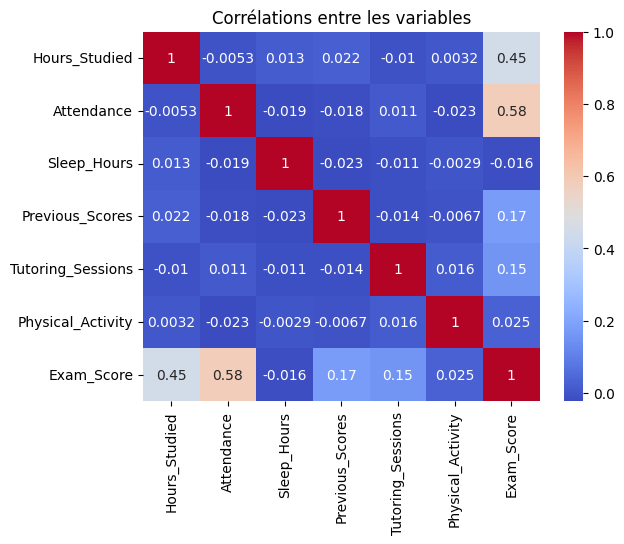

In [5]:
df_donnees_numeriques = df.select_dtypes(include=['int64'])
matrice_de_correlations = df_donnees_numeriques.corr()
sns.heatmap(matrice_de_correlations, annot=True, cmap='coolwarm')
plt.title('Corrélations entre les variables')
plt.show()

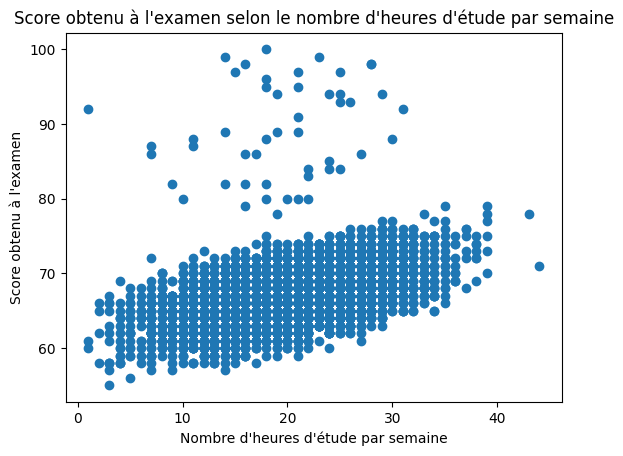

In [6]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title('Score obtenu à l\'examen selon le nombre d\'heures d\'étude par semaine')
plt.xlabel('Nombre d\'heures d\'étude par semaine')
plt.ylabel('Score obtenu à l\'examen')
plt.show()

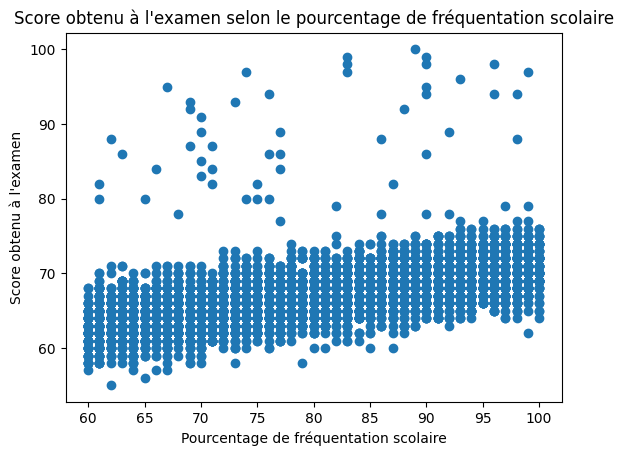

In [7]:
plt.scatter(df['Attendance'], df['Exam_Score'])
plt.title('Score obtenu à l\'examen selon le pourcentage de fréquentation scolaire')
plt.xlabel('Pourcentage de fréquentation scolaire')
plt.ylabel('Score obtenu à l\'examen')
plt.show()

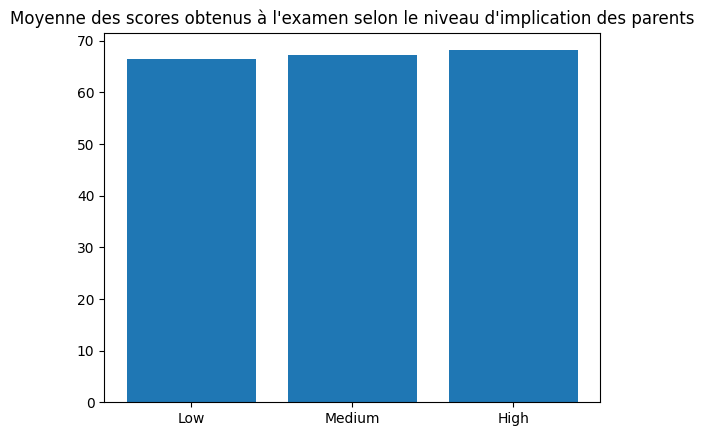

In [8]:
categories = []
valeurs = []
for c in df['Parental_Involvement'].unique():
    categories.append(c)
    valeurs.append(df[df['Parental_Involvement'] == c]['Exam_Score'].mean())
plt.bar(categories, valeurs)
plt.title('Moyenne des scores obtenus à l\'examen selon le niveau d\'implication des parents')
plt.show()

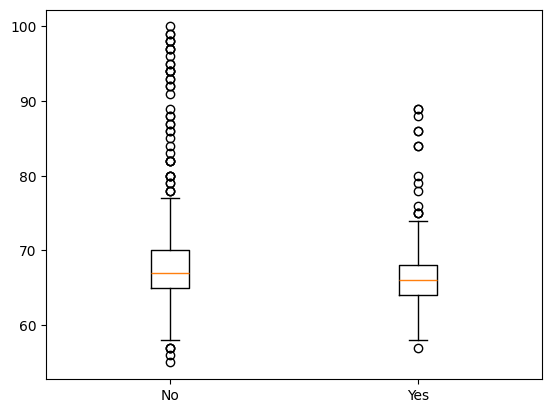

In [9]:
df2 = df[['Learning_Disabilities', 'Exam_Score']]
plt.boxplot([
    df2[df2['Learning_Disabilities'] == 'No']['Exam_Score'],
    df2[df2['Learning_Disabilities'] == 'Yes']['Exam_Score']
], tick_labels=['No', 'Yes'])
plt.show()

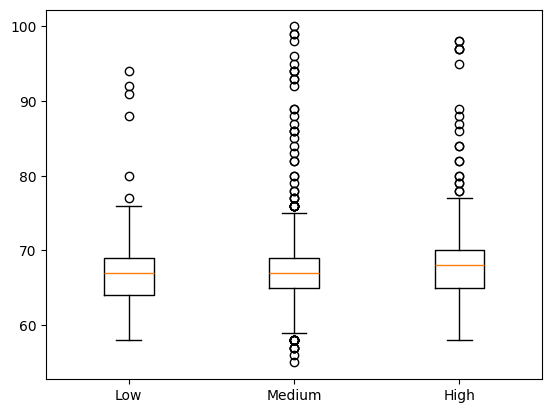

In [10]:
df3 = df[['Teacher_Quality', 'Exam_Score']]
plt.boxplot([
    df3[df3['Teacher_Quality'] == 'Low']['Exam_Score'],
    df3[df3['Teacher_Quality'] == 'Medium']['Exam_Score'],
    df3[df3['Teacher_Quality'] == 'High']['Exam_Score']
], tick_labels=['Low', 'Medium', 'High'])
plt.show()